# UTS Machine Learning - Tugas Klasifikasi
# Nama: M Faishal Abdurrahman
# NIM: 1103213015

Mount Google Drive

In [ ]:
from google.colab import drive
_drive_mount_path = '/content/drive'
drive.mount(_drive_mount_path)

# Path ke file CSV di Drive
file_path = f"{_drive_mount_path}/MyDrive/UTS/KlasifikasiUTS.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, auc)

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
# Seleksi fitur
from sklearn.feature_selection import mutual_info_classif

Load & Inspeksi Data

In [ ]:
# Load dataset
df = pd.read_csv(file_path)
# Tampilkan ukuran dan kolom\ nprint("Bentuk data:", df.shape)
print("Daftar kolom:", df.columns.tolist())
df.head()

Daftar kolom: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Analisis Data Eksplorasi (EDA)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027

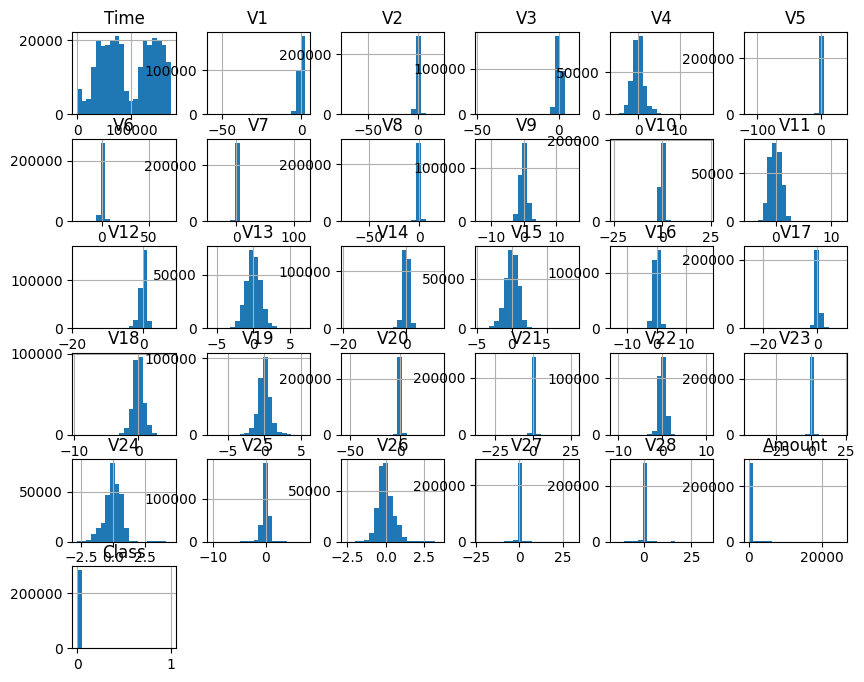

In [ ]:
# Cek nilai hilang
print(df.isnull().sum())

# Statistik dasar
print(df.describe(include='all'))

# Proporsi kelas
print(df['Time'].value_counts(normalize=True))

# Histogram fitur numerik
df.hist(bins=20, figsize=(10,8));

Pembersihan & Persiapan Data

In [ ]:
# 5.1 Buang duplikasi
awal = len(df)  # Store initial length of the dataframe
df = df.drop_duplicates()
print(f"Duplikasi yang dihapus: {awal - len(df)} jika ada duplikat sebelumnya")

# 5.2 Imputasi nilai hilang
default_numeric = df.select_dtypes(include=[np.number]).columns
for col in default_numeric:
    df[col] = df[col].fillna(df[col].median())

default_categorical = df.select_dtypes(include=['object','category']).columns
for col in default_categorical:
    df[col] = df[col].fillna(df[col].mode()[0])

# 5.3 Definisikan X dan y
# Ganti 'Time' dengan nama kolom target yang benar jika perlu
X = df.drop('Time', axis=1)
y = df['Time']

# 5.4 Bagi data latih dan uji
# Coba stratify, jika gagal gunakan tanpa stratify
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    print("Split data dengan stratify berhasil.")
except ValueError:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    print("Perhatian: stratify dihilangkan karena kelas target hanya memiliki satu anggota di salah satu kelas.")

Duplikasi yang dihapus: 1081 jika ada duplikat sebelumnya
Perhatian: stratify dihilangkan karena kelas target hanya memiliki satu anggota di salah satu kelas.


Seleksi Fitur

In [ ]:
# Subsampling untuk mutual information (misal 5000 baris acak)
sample_n = 5000 if len(X_train) > 5000 else len(X_train)
X_sample = X_train.sample(n=sample_n, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Identifikasi fitur numerik dan kategorikal
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object','category']).columns.tolist()

# 6.1 Mutual Information pada sampel
from sklearn.feature_selection import mutual_info_classif
nmi = mutual_info_classif(X_sample[numeric_features], y_sample)
mi_series = pd.Series(nmi, index=numeric_features).sort_values(ascending=False)
print("Mutual Information (numerik, sampel):")
print(mi_series)

# 6.2 ANOVA F-test alternatif
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_sample[numeric_features], y_sample)
f_scores = pd.Series(selector.scores_, index=numeric_features).sort_values(ascending=False)
print("ANOVA F-test (numerik, sampel):")
print(f_scores)

# Pilih top-5 fitur berdasarkan MI atau F-test
top_mi = mi_series.head(5).index.tolist()
top_f = f_scores.head(5).index.tolist()
print(f"Fitur terpilih MI: {top_mi}")
print(f"Fitur terpilih F-test: {top_f}")

Mutual Information (numerik, sampel):
V3        0.276647
V22       0.266096
V28       0.209447
V1        0.205610
V4        0.166494
V25       0.160290
V10       0.158318
V20       0.154535
V21       0.146194
V5        0.105414
V12       0.103310
V26       0.072283
V8        0.065926
V27       0.063414
V18       0.033739
V7        0.029086
V9        0.024547
V14       0.017451
V23       0.006583
V17       0.006216
V2        0.000000
V6        0.000000
V13       0.000000
V11       0.000000
V16       0.000000
V15       0.000000
V19       0.000000
V24       0.000000
Amount    0.000000
Class     0.000000
dtype: float64
ANOVA F-test (numerik, sampel):
Class          inf
V27       3.812798
V23       3.499538
V21       2.181846
V20       2.058505
V12       2.029267
V8        1.899197
V28       1.617705
V22       1.536174
V3        1.502144
V13       1.455156
V4        1.433041
V5        1.432654
V7        1.407012
V15       1.269991
V14       1.265607
V17       1.251741
V25       1.183785
V11

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Pipeline Pra-pemrosesan & Rekayasa Fitur Pipeline Pra-pemrosesan & Rekayasa Fitur

In [ ]:
# Tentukan fitur terpilih
top_features = top_mi  # atau top_f
print(f"Menggunakan fitur terpilih: {top_features}")

# Subset data latih dan uji
X_train = X_train[top_features]
X_test  = X_test[top_features]

# Buat pipeline hanya untuk fitur terpilih
after_num = Pipeline([('scaler', StandardScaler())])
# Jika ada kategorikal, buat cat pipeline
after_cat = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))])

# Preprocessor sekarang hanya untuk numeric
preprocessor = ColumnTransformer([
    ('num', after_num, top_features),
    # ('cat', after_cat, categorical_features)
])

Menggunakan fitur terpilih: ['V3', 'V22', 'V28', 'V1', 'V4']


Fungsi Pelatihan & Evaluasi Model

In [ ]:
from sklearn.model_selection import cross_val_score

def buat_model(seed=42):
    return {
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=seed),
        'DecisionTree': DecisionTreeClassifier(random_state=seed),
        'KNN': KNeighborsClassifier(),
        'Bagging': BaggingClassifier(random_state=seed),
        'AdaBoost': AdaBoostClassifier(random_state=seed),
        'SVM': SVC(probability=True, random_state=seed)
    }

# Fungsi evaluasi model dengan penanganan AUC multiclass robust
def evaluasi(models):
    res = []
    for n, m in models.items():
        pipe = Pipeline([('pre', preprocessor), ('m', m)])
        pipe.fit(X_train, y_train)
        p = pipe.predict(X_test)

        # Predict probabilities
        try:
            probas = pipe.predict_proba(X_test)

            if probas.shape[1] == 2:
                # Binary classification
                prob = probas[:, 1]
                roc = roc_auc_score(y_test, prob)
            else:
                # Multiclass classification
                roc = roc_auc_score(y_test, probas, multi_class='ovr', average='weighted')

        except Exception as e:
            print(f"Warning: {n} gagal predict_proba - {e}")
            roc = np.nan

        report = classification_report(y_test, p, output_dict=True)['weighted avg']

        res.append({
            'model': n,
            'akurasi': pipe.score(X_test, y_test),
            'roc_auc': roc,
            'precision': report['precision'],
            'recall': report['recall'],
            'f1-score': report['f1-score']
        })

        cm = confusion_matrix(y_test, p)
        sns.heatmap(cm, annot=True, fmt='d'); plt.title(f"Confusion Matrix: {n}"); plt.show()

        if probas.shape[1] == 2:
            # Only plot ROC curve if binary
            fpr, tpr, _ = roc_curve(y_test, prob)
            plt.plot(fpr, tpr); plt.plot([0,1],[0,1],'--'); plt.title(f"ROC Curve: {n}"); plt.show()
        else:
            print(f"Skipping ROC curve for multiclass model: {n}")

    return pd.DataFrame(res)

perbandingan model

Ukuran setelah subsampling: X_train=(5, 5), X_test=(5, 5)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

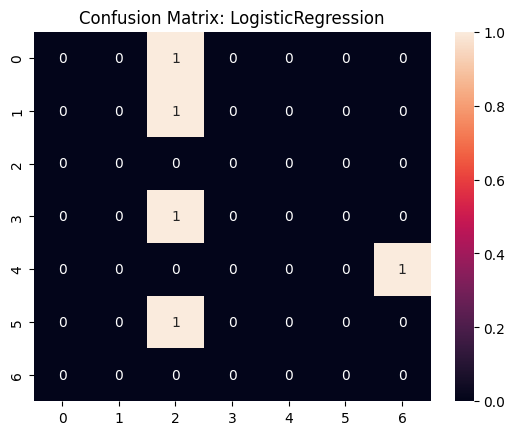

Skipping ROC curve for multiclass model: LogisticRegression


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

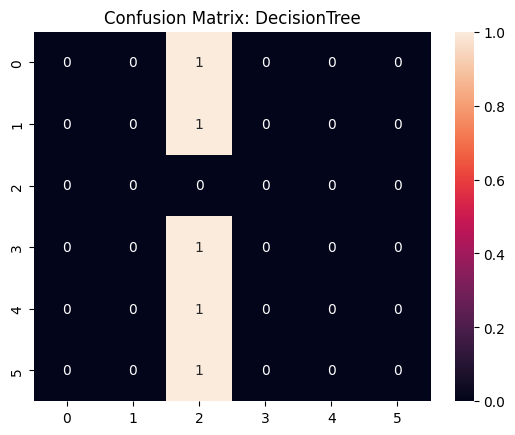

Skipping ROC curve for multiclass model: DecisionTree


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

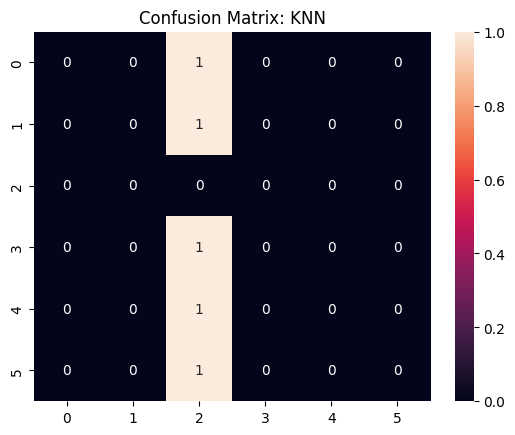

Skipping ROC curve for multiclass model: KNN


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

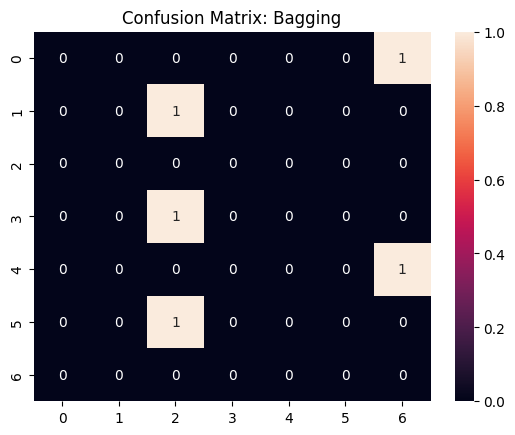

Skipping ROC curve for multiclass model: Bagging


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

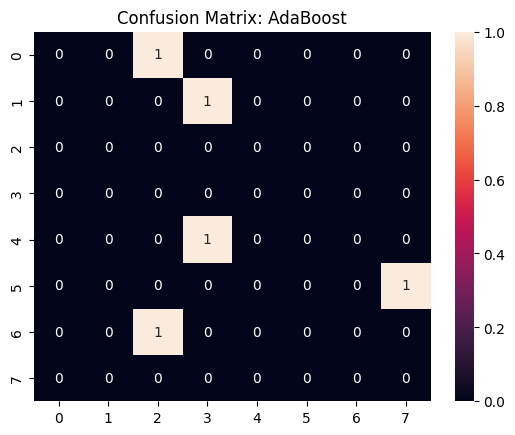

Skipping ROC curve for multiclass model: AdaBoost


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

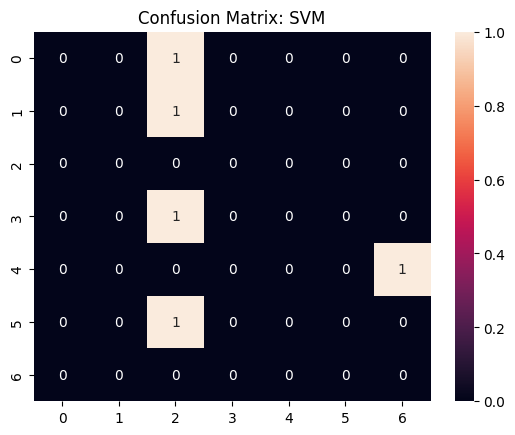

Skipping ROC curve for multiclass model: SVM


,model,akurasi,roc_auc,precision,recall,f1-score
4,AdaBoost,0.0,0.55,0.0,0.0,0.0
5,SVM,0.0,0.55,0.0,0.0,0.0
2,KNN,0.0,0.50,0.0,0.0,0.0
1,DecisionTree,0.0,0.50,0.0,0.0,0.0
0,LogisticRegression,0.0,0.45,0.0,0.0,0.0
3,Bagging,0.0,0.30,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['roc_auc'].plot(kind='hist', bins=20, title='roc_auc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='roc_auc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['akurasi']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('akurasi', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('akurasi')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['akurasi']
  ys = series['roc_auc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('akurasi', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('akurasi')
_ = plt.ylabel('roc_auc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['akurasi']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'akurasi'}, axis=1)
              .sort_values('akurasi', ascending=True))
  xs = counted['akurasi']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('akurasi', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('akurasi')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['precision']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('precision')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['roc_auc'].plot(kind='line', figsize=(8, 4), title='roc_auc')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='index', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='roc_auc', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# 10.1 Subsampling data untuk evaluasi agar tidak crash
max_sample = 500
if len(X_train) > max_sample:
    X_train = X_train.sample(n=max_sample, random_state=42)
    y_train = y_train.loc[X_train.index]
if len(X_test) > max_sample:
    X_test = X_test.sample(n=max_sample, random_state=42)
    y_test = y_test.loc[X_test.index]
print(f"Ukuran setelah subsampling: X_train={X_train.shape}, X_test={X_test.shape}")

# 10.2 Definisikan ulang models setelah subsampling
models = buat_model()

# 10.3 Jalankan evaluasi pada sampel
df_results = evaluasi(models)

# 10.4 Tampilkan hasil
display(df_results.sort_values('roc_auc', ascending=False))